In [ ]:
# Importing the data (stock data)

# Processing the data -> 3d arr -> (samples, timesteps, features)
# >> Normalize - Using StandardScaler / MinMaxScaler - (-1,1) or (0,1)
# we need to create sequences (,,)

# Creating the LSTM model and make predictions
# >> inverse scaling to make predictions (to bring data into original form)

# Evaluate the data for the n_timesteps
# Determine the predictions for the next 30 days.

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input

In [4]:
import pandas_datareader as pdr

# get a key
# Select a stock brand
# Import based on the number of requests available

In [5]:
# work with sample dataset first
data = [100.5, 102.3, 101.8, 103.0, 104.5, 105.2, 104.8, 106.3, 107.1, 108.0]

In [6]:
# reshaping the sequence
import numpy as np
data = np.array(data)
df= data.reshape(-1, 1)
df

array([[100.5],
       [102.3],
       [101.8],
       [103. ],
       [104.5],
       [105.2],
       [104.8],
       [106.3],
       [107.1],
       [108. ]])

In [13]:
# preprocess data
def preprocess_data(timeseries_data, n_features):
  X,y = [],[]
  for i in range(len(timeseries_data)):
    end_idx = n_features + i
    if end_idx > len(timeseries_data)-1:
      break
    X.append(timeseries_data[i:end_idx])
    y.append(timeseries_data[end_idx])
  return np.array(X), np.array(y)

In [27]:
n_timesteps = 3
X,y = preprocess_data(data, n_timesteps)
X,y

(array([[100.5, 102.3, 101.8],
        [102.3, 101.8, 103. ],
        [101.8, 103. , 104.5],
        [103. , 104.5, 105.2],
        [104.5, 105.2, 104.8],
        [105.2, 104.8, 106.3],
        [104.8, 106.3, 107.1]]),
 array([103. , 104.5, 105.2, 104.8, 106.3, 107.1, 108. ]))

In [28]:
print(X)

[[100.5 102.3 101.8]
 [102.3 101.8 103. ]
 [101.8 103.  104.5]
 [103.  104.5 105.2]
 [104.5 105.2 104.8]
 [105.2 104.8 106.3]
 [104.8 106.3 107.1]]


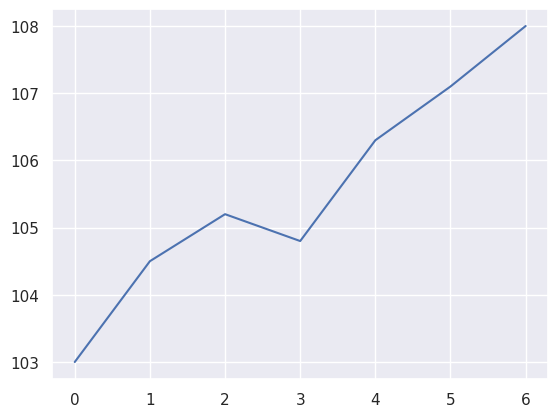

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(y)
plt.show()

In [30]:
# Reshaping because -> LSTM requires n_samples, n_timesteps, n_features

In [31]:
X.shape

(7, 3)

In [32]:
X = X.reshape(X.shape[0], X.shape[1], 1)
X

array([[[100.5],
        [102.3],
        [101.8]],

       [[102.3],
        [101.8],
        [103. ]],

       [[101.8],
        [103. ],
        [104.5]],

       [[103. ],
        [104.5],
        [105.2]],

       [[104.5],
        [105.2],
        [104.8]],

       [[105.2],
        [104.8],
        [106.3]],

       [[104.8],
        [106.3],
        [107.1]]])

In [34]:
X.shape
n_features = 1

In [43]:
# Build LSTM model -> Sequential API
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences = True , input_shape = (n_timesteps, n_features)))
model.add(Dropout(0.1))
model.add(LSTM(50, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.summary()

model.compile(optimizer = 'adam', loss = 'mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 3, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(X,y, epochs = 25, batch_size = 32, verbose = 1)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 10527.6826
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10446.8877
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9818.0996
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9451.6699
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9065.5811
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9031.5020
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 7817.1885
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 7482.6519
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6725.2280
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6481.6562
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 5372.0054
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5215.4062
Epoch 13/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 4371.6685
Epoch 14/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 3817.4529
Epoch 15/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss:

In [54]:
x_input = np.array([187, 196, 210])
temp_list = list(x_input)
lst_output = []
i = 0
while i < 10:
  if len(temp_list) > 3:
    # arrange input based on timesteps
    x_input = np.array(temp_list[1:])

    print('day: {} : Input:{}'.format(i, x_input))
    # Reshaping for (samples, n_timesteps, n_features)
    x_input_reshaped = x_input.reshape(1, n_timesteps, n_features)
    yhat = model.predict(x_input_reshaped, verbose = 0)
    print('day:{} : Output:{}'.format(i, yhat))
    temp_list.append(yhat[0][0])
    print(yhat)
    temp_list = temp_list[1:]
    lst_output.append(yhat[0][0])
    i+=1
  else:
    x_input = x_input.reshape((1, n_timesteps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_list.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i=i+1

print(lst_output)

[235.29422]
day: 1 : Input:[196.         210.         235.29421997]
day:1 : Output:[[250.00926]]
[[250.00926]]
day: 2 : Input:[210.         235.29421997 250.00926208]
day:2 : Output:[[269.20706]]
[[269.20706]]
day: 3 : Input:[235.29422 250.00926 269.20706]
day:3 : Output:[[293.65527]]
[[293.65527]]
day: 4 : Input:[250.00926 269.20706 293.65527]
day:4 : Output:[[313.33484]]
[[313.33484]]
day: 5 : Input:[269.20706 293.65527 313.33484]
day:5 : Output:[[336.23804]]
[[336.23804]]
day: 6 : Input:[293.65527 313.33484 336.23804]
day:6 : Output:[[362.18347]]
[[362.18347]]
day: 7 : Input:[313.33484 336.23804 362.18347]
day:7 : Output:[[386.49905]]
[[386.49905]]
day: 8 : Input:[336.23804 362.18347 386.49905]
day:8 : Output:[[413.62567]]
[[413.62567]]
day: 9 : Input:[362.18347 386.49905 413.62567]
day:9 : Output:[[443.04276]]
[[443.04276]]
[235.29422, 250.00926, 269.20706, 293.65527, 313.33484, 336.23804, 362.18347, 386.49905, 413.62567, 443.04276]


In [55]:
x = [[23]]

In [56]:
x[0]

[23]

In [57]:
x[0][0]

23